### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the dataset

In [4]:
df = pd.read_csv("D:/Chools/Day_04/data_clean.csv")
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


### Check for missing data

In [5]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64


### Drop rows with missing data

In [6]:
df = df.dropna()

### Drop the 'Unnamed: 0' and 'Year' column

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Year', axis=1)

In [8]:
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Ozone      0
Solar.R    0
Wind       0
Temp C     0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64


### Showing all the unique values

In [9]:
for column in df.columns:
    unique_items = df[column].unique()
    print(f"Unique items in '{column}':\n{unique_items}\n")


Unique items in 'Ozone':
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  34.   6.  30.   1.
   4.  32.  45. 115.  37.  29.  71.  39.  21.  20.  13. 135.  49.  64.
  40.  77.  97.  85.  10.  27.   7.  48.  35.  61.  79.  63.  80. 108.
  82.  50.  59. 122.  89. 110.  44.  28.  65.  22.  31.   9. 168.  73.
  76. 118.  84.  96.  78.  91.  47.  24.  46.]

Unique items in 'Solar.R':
[190. 118. 149. 313. 299.  99.  19. 256. 290. 274.  65. 334. 307.  78.
 322.  44.   8. 320.  25.  92.  13. 252. 223. 279. 127. 291. 323. 148.
 191. 284.  37. 120. 137. 269. 248. 236. 175. 314. 276. 267. 272. 264.
  48. 260. 285. 187. 220.   7. 294.  81. 213. 275. 253. 254.  83.  77.
 255. 229. 207. 192. 273. 157.  71.  51. 115. 244. 259.  36. 212. 238.
 215. 203. 225. 237. 188. 167. 197. 183. 189.  95. 230.  24. 112. 224.
  27. 201.  14. 139.  49.  20. 193. 131.]

Unique items in 'Wind':
[ 7.4  8.  12.6 11.5  8.6 13.8 20.1  9.7  9.2 10.9 13.2 12.  18.4 16.6
 14.9  5.7 20.7 10.3  4.1  4.6  5.1  6.3 14.3  6.9  

### Changing a Value in Month column from 'May' to 5

In [10]:
df['Month'] = df['Month'].replace('May', 5)

### Summary statistics

In [11]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
             Ozone     Solar.R        Wind         Day        Temp
count  113.000000  113.000000  113.000000  113.000000  113.000000
mean    41.725664  186.831858    9.859292   16.150442   77.486726
std     33.019271   88.645452    3.549261    8.792470    9.491646
min      1.000000    7.000000    2.300000    1.000000   57.000000
25%     18.000000  120.000000    7.400000    9.000000   71.000000
50%     30.000000  203.000000    9.700000   17.000000   78.000000
75%     61.000000  255.000000   11.500000   23.000000   84.000000
max    168.000000  334.000000   20.700000   31.000000   97.000000


### Pairplot for a quick overview of relationships

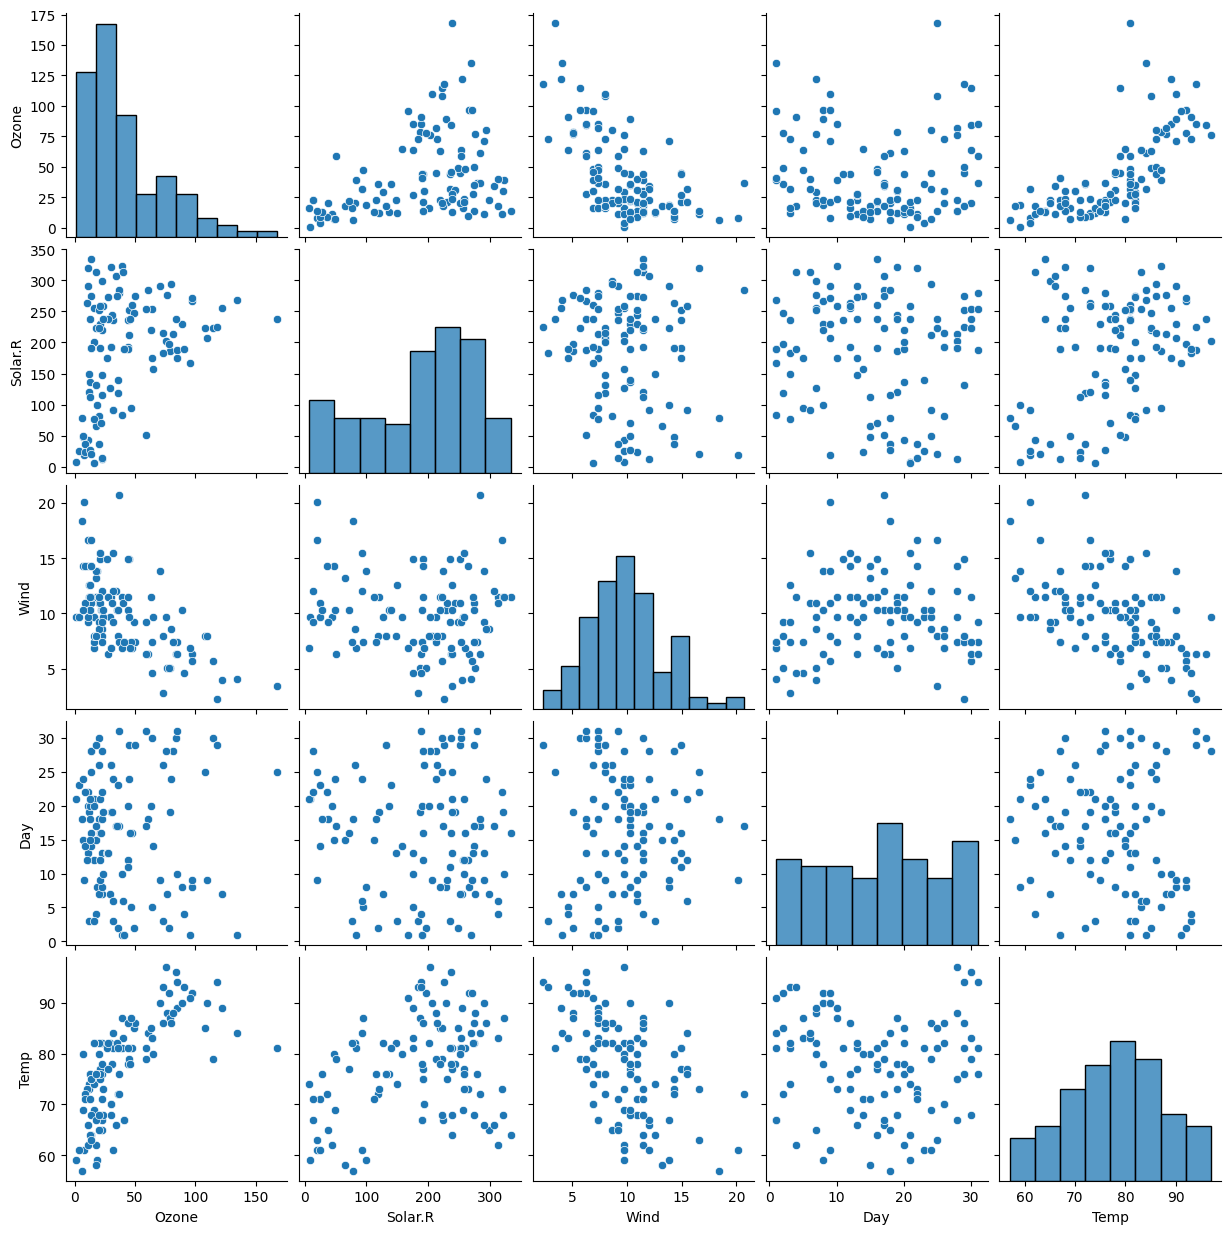

In [12]:
sns.pairplot(df)
plt.show()

### Correlation heatmap

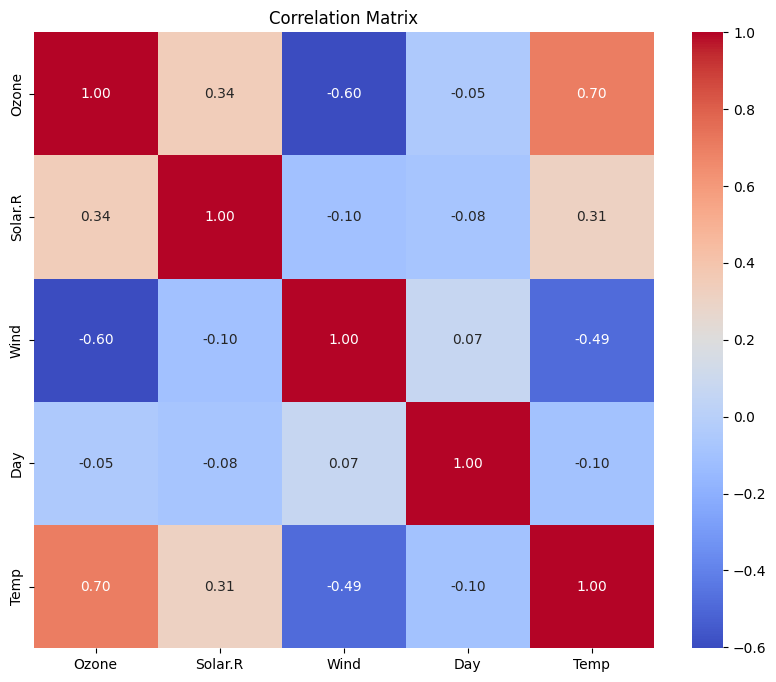

In [13]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Boxplot for outliers

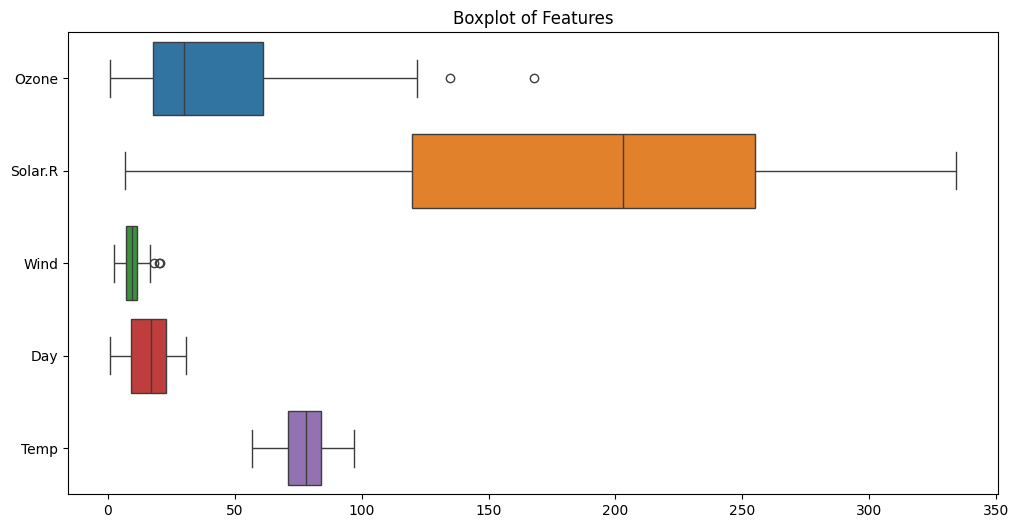

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features")
plt.show()

### Removing outliers

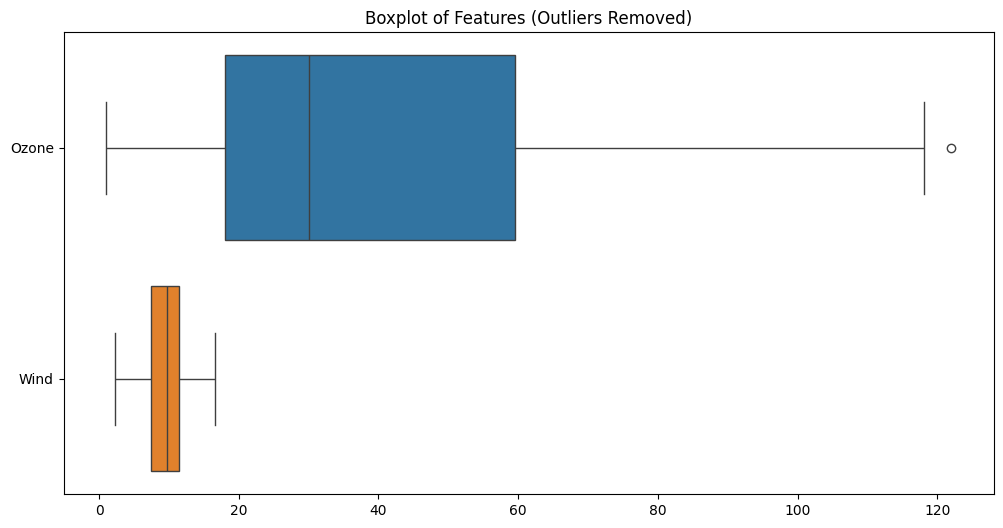

In [15]:
# Define the columns for which you want to remove outliers
columns_to_remove_outliers = ['Ozone', 'Wind']

# Function to remove outliers based on IQR
def remove_outliers(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from specified columns
df_no_outliers = remove_outliers(df, columns_to_remove_outliers)

# Visualize boxplots after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[columns_to_remove_outliers], orient="h")
plt.title("Boxplot of Features (Outliers Removed)")
plt.show()

### Histogram for each numerical column

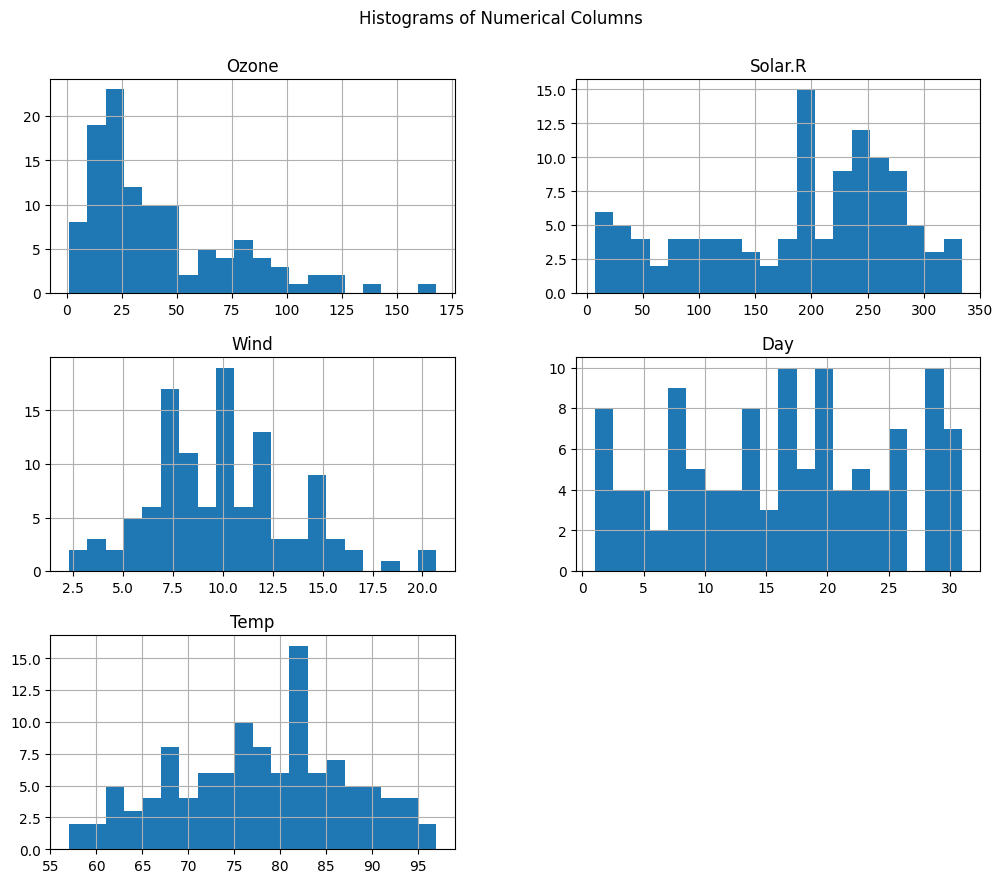

In [16]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Columns", y=0.95)
plt.show()

### Countplot for categorical column 'Weather'

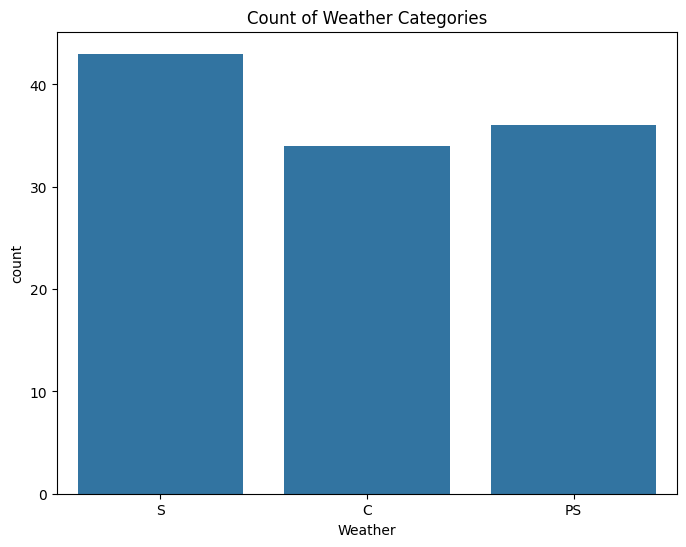

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather', data=df)
plt.title("Count of Weather Categories")
plt.show()